In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
DB_HOST = '89.223.95.138'
DB_USER = 'student_9'
DB_USER_PASSWORD = 'student_9'
DB_NAME = 'student_9'

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

In [ ]:
# Проверка того, какие таблицы уже есть в базе данных
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,adv_glossary,student_9,None,True,False,True,False
1,public,adv_events,student_9,None,True,False,True,False


###Логическая модель

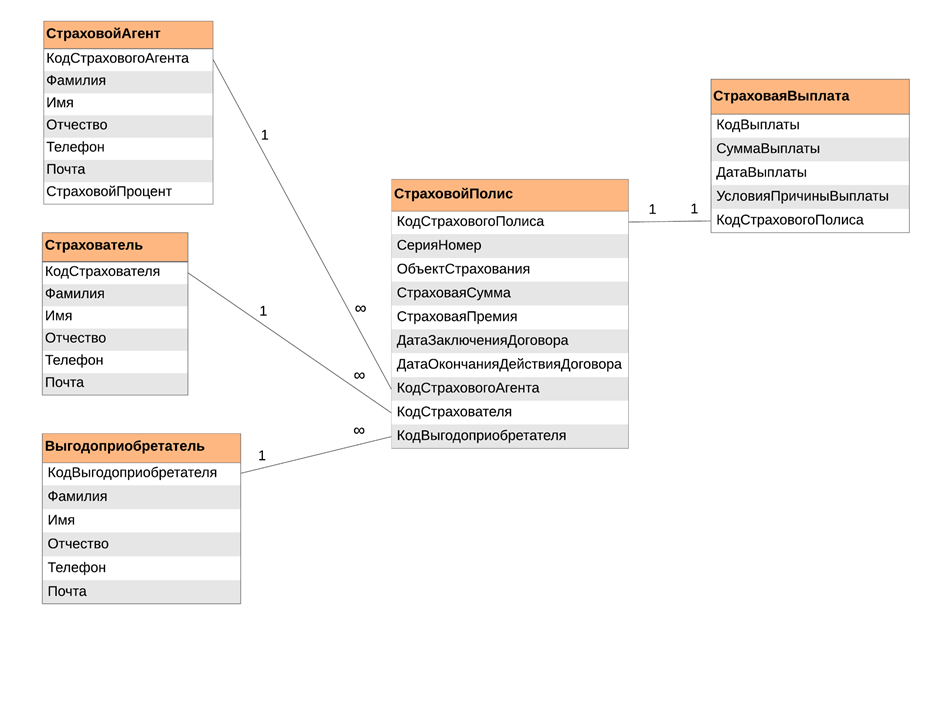

### Создание таблиц

In [ ]:
# Таблица "Страховой агент"
query = """
CREATE TABLE insurance_agents
(
  id SERIAL PRIMARY KEY,
  last_name CHARACTER VARYING(30) NOT NULL CHECK(last_name != ''),
  first_name CHARACTER VARYING(30) NOT NULL CHECK(first_name != ''),
	middle_name CHARACTER VARYING(30) NOT NULL CHECK(middle_name != ''),
  phone CHARACTER VARYING(18) NOT NULL UNIQUE CHECK(phone != ''),
  email CHARACTER VARYING(30) NOT NULL CHECK(email != '') UNIQUE,
	insurance_percent REAL CHECK((insurance_percent >= 0.2) AND (insurance_percent <= 1)) NOT NULL
);
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
# Таблица "Страхователь"
query = """
CREATE TABLE insurants
(
	id SERIAL PRIMARY KEY,
	last_name CHARACTER VARYING(30) NOT NULL CHECK(last_name != ''),
  first_name CHARACTER VARYING(30) NOT NULL CHECK(first_name != ''),
	middle_name CHARACTER VARYING(30) NOT NULL CHECK(middle_name != ''),
  phone CHARACTER VARYING(18) NOT NULL UNIQUE CHECK(phone != ''),
  email CHARACTER VARYING(30) NOT NULL CHECK(email != '') UNIQUE
);
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
# Таблица "Выгодоприобретатель"
query = """
CREATE TABLE beneficiaries
(
	id SERIAL PRIMARY KEY,
	last_name CHARACTER VARYING(30) NOT NULL CHECK(last_name != ''),
  first_name CHARACTER VARYING(30) NOT NULL CHECK(first_name != ''),
	middle_name CHARACTER VARYING(30) NOT NULL CHECK(middle_name != ''),
  phone CHARACTER VARYING(18) NOT NULL UNIQUE CHECK(phone != ''),
  email CHARACTER VARYING(30) NOT NULL CHECK(email != '') UNIQUE
);
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
# Таблица "Страховой полис"
query = """
CREATE TABLE insuranсe_policies
(
	id SERIAL PRIMARY KEY,
	series_and_number CHARACTER VARYING(10) NOT NULL UNIQUE CHECK(series_and_number != ''),
	object_insurance CHARACTER VARYING(30) NOT NULL CHECK(object_insurance != ''),
	insurance_amount NUMERIC(8,2) NOT NULL,
	insurance_premium NUMERIC(8,2) NOT NULL,
	date_in DATE NOT NULL,
	date_out DATE NOT NULL,
	id_agent INTEGER,
	id_insurant INTEGER,
	id_beneficiary INTEGER,
	FOREIGN KEY (id_agent) REFERENCES insurance_agents (id) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (id_insurant) REFERENCES insurants (id) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (id_beneficiary) REFERENCES beneficiaries (id) ON DELETE CASCADE ON UPDATE CASCADE
); 
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
# Таблица "Страховая выплата"
query = """
CREATE TABLE insurance_payments
(
	id SERIAL PRIMARY KEY,
	amount NUMERIC(8,2) NOT NULL,
	date DATE NOT NULL,
	terms_and_reasons CHARACTER VARYING(255) NOT NULL CHECK(terms_and_reasons != ''),
	id_policy INTEGER,
	FOREIGN KEY (id_policy) REFERENCES insuranсe_policies(id) ON DELETE CASCADE ON UPDATE CASCADE
)
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
# Проверка того, что все 5 таблиц были созданы
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,insurance_agents,student_9,None,True,False,True,False
1,public,insuranсe_policies,student_9,None,True,False,True,False
2,public,insurants,student_9,None,True,False,True,False
3,public,beneficiaries,student_9,None,True,False,True,False
4,public,insurance_payments,student_9,None,True,False,True,False
5,public,adv_glossary,student_9,None,True,False,True,False
6,public,adv_events,student_9,None,True,False,True,False


### Заполнение таблиц

In [ ]:
# Таблица "Страховой агент"
queries = []
agents = [['Ромашов', 'Евгений', 'Дмитриевич', '+7 (909) 454-51-60', 'romashka5@yandex.ru', 0.26],
          ['Скворцова', 'Вероника', 'Игоревна', '+7 (977) 986-10-07', 'SkvorcovaVI@gmail.com', 0.25],
          ['Ресин', 'Владимир', 'Иосифович', '+7 (912) 051-42-79', 'resinVI@yandex.ru', 0.31],
          ['Исаев', 'Андрей', 'Константинович', '+7 (964) 129-43-78', 'isaevAK@gmail.com', 0.26],
          ['Тимофеева', 'Ольга', 'Викторовна', '+7 (923) 339-55-66', 'timofeevaOV@yandex.ru', 0.28],
          ['Акимов', 'Максим', 'Алексеевич', '+7 (960) 907-64-99', 'akimovMA@list.ru', 0.36],
          ['Еремеев', 'Вадим', 'Юрьевич', '+7 (910)385-48-89', 'ermakov.v.u@mail.ru', 0.27]]
for value in agents:
  queries.append(f'INSERT INTO insurance_agents (last_name, first_name, middle_name, phone, email, insurance_percent) VALUES {value[0], value[1], value[2], value[3], value[4], value[5]};')

for query in queries:
  conn.cursor().execute(query)

conn.commit()

In [ ]:
# Таблица "Страхователь"
queries = []
policyholders = [['Носков', 'Константин', 'Юрьевич', '+7 (906) 962-15-42', 'NoskovKS@gmail.ru'],
                 ['Топилин', 'Максим', 'Анатольевич', '+7 (909) 312-12-73', 'topilinMA@mail.com'],
                 ['Алиханов', 'Антон', 'Андреевич', '+7 (910) 459-82-10', 'alihanovAA@mail.ru'],
                 ['Голодец','Ольга','Юрьевна','+7 (927) 172-61-32','GolodecOU@yandex.ru'],
                 ['Орешкин','Максим','Станиславович','+7 (937) 874-52-92','OreshkinMS@list.ru'],
                 ['Колокольцев','Владимир','Александрович','+7 (915) 557-41-08','KolocolcevVA@mail.ru'],
                 ['Васильева','Ольга','Юрьевна','+7 (921) 456-21-78','vasilyevOY@gmail.com'],
                 ['Мантуров','Денис','Валентинович','+7 (985) 657-91-19','manturovDV@yandex.ru'],
                 ['Голикова','Татьяна','Алексеевна','+7 (977) 826-45-51','GolikovaTA@list.ru']]
for value in policyholders:
  queries.append(f'INSERT INTO insurants (last_name, first_name, middle_name, phone, email) VALUES {value[0], value[1], value[2], value[3], value[4]};');

for query in queries:
  conn.cursor().execute(query)

conn.commit()

In [ ]:
# Таблица "Выгодоприобретатель"
queries = []
beneficiaries = [['Алиханов', 'Антон', 'Андреевич', '+7 (910) 459-82-10', 'alihanovAA@mail.ru'],
                 ['Трутнев', 'Юрий', 'Петрович', '+7 (907) 802-49-87', 'TrutnevYP@gmail.com'],
                 ['Голодец', 'Ольга', 'Юрьевна', '+7 (927) 172-61-32', 'GolodecOU@yandex.ru'],
                 ['Колокольцев','Владимир','Александрович','+7 (915) 557-41-08','KolocolcevVA@mail.ru'],
                 ['Орешкин','Максим','Станиславович','+7 (937) 874-52-92','OreshkinMS@list.ru'],
                 ['Скворцова','Вероника','Игоревна','+7 (912) 946-70-32','SkvorcovaVI@gmail.com'],
                 ['Козак','Дмитрий','Николаевич','+7 (977) 321-68-72','kozakDN@gmail.com'],
                 ['Зиничев','Евгений','Николаевич','+7 (985) 742-02-14','ZinichevEN@yandex.ru'],
                 ['Петрова','Екатерина','Юрьевна','+7 (906) 805-42-95','PetrovaEY@gmail.com']]
for value in beneficiaries:
  queries.append(f'INSERT INTO beneficiaries (last_name, first_name, middle_name, phone, email) VALUES {value[0], value[1], value[2], value[3], value[4]};');

for query in queries:
  conn.cursor().execute(query)

conn.commit()

In [ ]:
# Таблица "Страховой полис"
queries = []
policies = [['0567412354','Автомобиль', 10000, 500, '2015-06-05', '2016-06-05', 3, 3, 1],
            ['8315492310','Автомобиль', 23000, 800, '2018-10-10', '2019-10-10', 5, 1, 2],
            ['0456489461','Квартира', 500000, 10000, '2017-02-26', '2018-08-26', 5, 9, 8],
            ['7894163254','Дом', 675000, 15000, '2019-05-01', '2021-05-01', 7, 5, 5],
            ['9541682315','Земельный участок', 300000, 7000, '2018-11-05', '2019-11-05', 1, 7, 7],
            ['0524893215','Жизнь', 50000, 2000, '2018-03-11', '2018-09-11', 4, 4, 3],
            ['6254971322','Квартира', 450000, 9500, '2010-03-12', '2011-09-12', 6, 8, 6],
            ['5324152845','Ювелирные изделия', 100000, 3000, '2019-08-09', '2021-08-09', 2, 6, 4],
            ['1597265321','Автомобиль', 5000, 750, '2016-07-16', '2017-07-16', 6, 2, 9],
            ['5847846178','Автомобиль', 20000, 900, '2015-03-19', '2016-03-19', 3, 3, 1]]
for value in policies:
  queries.append(f'INSERT INTO insuranсe_policies (series_and_number, object_insurance, insurance_amount, insurance_premium, date_in, date_out, id_agent, id_insurant, id_beneficiary) VALUES {value[0], value[1], value[2], value[3], value[4], value[5], value[6], value[7], value[8]};');

for query in queries:
  conn.cursor().execute(query)

conn.commit()

In [ ]:
# Таблица "Страховая выплата"
queries = []
payouts = [[7500, '2015-09-21', 'Стихийное бедствие', 1],
           [25000, '2019-09-01', 'Неурожайный год', 9],
           [100000, '2017-12-31', 'Непреднамеренная порча имущества', 3],
           [20000, '2019-10-19', 'Непреднамеренная утрата имущества', 8],
           [2300, '2017-02-04', 'Повреждение транспортного средства в ДТП, при условии что в нём нет вины владельца', 5]]
for value in payouts:
  queries.append(f'INSERT INTO insurance_payments (amount, date, terms_and_reasons, id_policy) VALUES {value[0], value[1], value[2], value[3]};');

for query in queries:
  conn.cursor().execute(query)

conn.commit()

### Запросы

In [ ]:
# Страховая сумма по объектам страхования
pd.read_sql_query("""
SELECT object_insurance      AS "Объект страхования",
       Sum(insurance_amount) AS "Общая страховая сумма",
       Avg(insurance_amount),
       Min(insurance_amount),
       Max(insurance_amount)
FROM   insuranсe_policies
GROUP  BY object_insurance
ORDER  BY Sum(insurance_amount) DESC 
    """, conn)

,Объект страхования,Общая страховая сумма,avg,min,max
0,Квартира,950000.0,475000.0,450000.0,500000.0
1,Дом,675000.0,675000.0,675000.0,675000.0
2,Земельный участок,300000.0,300000.0,300000.0,300000.0
3,Ювелирные изделия,100000.0,100000.0,100000.0,100000.0
4,Автомобиль,58000.0,14500.0,5000.0,23000.0
5,Жизнь,50000.0,50000.0,50000.0,50000.0


In [ ]:
# Страховая премия по объектам страхования
pd.read_sql_query("""
SELECT object_insurance       AS "Объект страхования",
       Sum(insurance_premium) AS "Общая страховая премия",
       Avg(insurance_premium),
       Min(insurance_premium),
       Max(insurance_premium)
FROM   insuranсe_policies
GROUP  BY object_insurance
ORDER  BY Sum(insurance_premium) DESC 
    """, conn)

,Объект страхования,Общая страховая премия,avg,min,max
0,Квартира,19500.0,9750.0,9500.0,10000.0
1,Дом,15000.0,15000.0,15000.0,15000.0
2,Земельный участок,7000.0,7000.0,7000.0,7000.0
3,Ювелирные изделия,3000.0,3000.0,3000.0,3000.0
4,Автомобиль,2950.0,737.5,500.0,900.0
5,Жизнь,2000.0,2000.0,2000.0,2000.0


In [ ]:
# Продажи по сотрудникам
pd.read_sql_query("""
SELECT last_name                                 AS "Фамилия",
       first_name                                AS "Имя",
       middle_name                               AS "Отчество",
       Count(*)                                  AS "Кол-во сделок",
       Sum(insurance_amount + insurance_premium) AS "Сумма сделок"
FROM   insurance_agents
       INNER JOIN insuranсe_policies
               ON insurance_agents.id = insuranсe_policies.id_agent
GROUP  BY last_name,
          first_name,
          middle_name
ORDER  BY last_name 
    """, conn)

,Фамилия,Имя,Отчество,Кол-во сделок,Сумма сделок
0,Акимов,Максим,Алексеевич,2,465250.0
1,Еремеев,Вадим,Юрьевич,1,690000.0
2,Исаев,Андрей,Константинович,1,52000.0
3,Ресин,Владимир,Иосифович,2,31400.0
4,Ромашов,Евгений,Дмитриевич,1,307000.0
5,Скворцова,Вероника,Игоревна,1,103000.0
6,Тимофеева,Ольга,Викторовна,2,533800.0


In [ ]:
# Заработки страховых агентов
pd.read_sql_query("""
SELECT last_name                                                         AS
       "Фамилия",
       first_name                                                        AS
       "Имя",
       middle_name                                                       AS
       "Отчество",
       Sum(insurance_percent * ( insurance_amount + insurance_premium )) AS
       "Суммарная выплата агенту"
FROM   insurance_agents
       JOIN insuranсe_policies
         ON insurance_agents.id = insuranсe_policies.id_agent
GROUP  BY last_name,
          first_name,
          middle_name 
    """, conn)

,Фамилия,Имя,Отчество,Суммарная выплата агенту
0,Исаев,Андрей,Константинович,13519.999504
1,Ромашов,Евгений,Дмитриевич,79819.997072
2,Ресин,Владимир,Иосифович,9734.000075
3,Акимов,Максим,Алексеевич,167490.006655
4,Еремеев,Вадим,Юрьевич,186300.007403
5,Тимофеева,Ольга,Викторовна,149464.000636
6,Скворцова,Вероника,Игоревна,25750.000000


In [ ]:
# Кол-во людей (сотрудников, клиентов), использующих тот или иной почтовый сервис
pd.read_sql_query("""
SELECT 'gmail'                             AS "Почтовый сервис",
       Count(last_name)
       + (SELECT Count(last_name)
          FROM   insurants
          WHERE  email LIKE '%@gmail.com')
       + (SELECT Count(last_name)
          FROM   beneficiaries
          WHERE  email LIKE '%@gmail.com') AS
       "Кол-во пользователей"
FROM   insurance_agents
WHERE  email LIKE '%@gmail.com'
UNION
SELECT 'mail'                            AS "Почтовый сервис",
       Count(last_name)
       + (SELECT Count(last_name)
          FROM   insurants
          WHERE  email LIKE '%@mail.ru')
       + (SELECT Count(last_name)
          FROM   beneficiaries
          WHERE  email LIKE '%@mail.ru') AS
       "Кол-во пользователей"
FROM   insurance_agents
WHERE  email LIKE '%@mail.ru'
UNION
SELECT 'yandex'                            AS "Почтовый сервис",
       Count(last_name)
       + (SELECT Count(last_name)
          FROM   insurants
          WHERE  email LIKE '%@yandex.ru')
       + (SELECT Count(last_name)
          FROM   beneficiaries
          WHERE  email LIKE '%@yandex.ru') AS
       "Кол-во пользователей"
FROM   insurance_agents
WHERE  email LIKE '%@yandex.ru' 
    """, conn)

,Почтовый сервис,Кол-во пользователей
0,gmail,7
1,yandex,7
2,mail,5


In [ ]:
# Доход и прибыль
# НО без учёта выплат страховым агентам
pd.read_sql_query("""
SELECT Sum(insurance_amount)                    AS "Страховая сумма",
       Sum(insurance_premium)                   AS "Страховая премия",
       Sum(amount)                              AS "Страховые выплаты",
       Sum(insurance_amount) +  Sum(insurance_premium)               AS "Доход",
       Sum(insurance_amount) +  Sum(insurance_premium) - Sum(amount) AS "Прибыль"
FROM   insurance_payments,
       insuranсe_policies
    """, conn)

,Страховая сумма,Страховая премия,Страховые выплаты,Доход,Прибыль
0,10665000.0,247250.0,1548000.0,10912250.0,9364250.0


In [ ]:
# Страховая сумма и премия по годам
pd.read_sql_query("""
SELECT CAST(Extract(year FROM date_in) AS INT)   AS "Год",
       Sum(insurance_amount)                     AS "Страховая сумма",
       Sum(insurance_premium)                    AS "Страховая премия"
FROM   insuranсe_policies
GROUP BY Extract(year FROM date_in) 
ORDER BY Extract(year FROM date_in) 
    """, conn)

,Год,Страховая сумма,Страховая премия
0,2010,450000.0,9500.0
1,2015,30000.0,1400.0
2,2016,5000.0,750.0
3,2017,500000.0,10000.0
4,2018,373000.0,9800.0
5,2019,775000.0,18000.0


In [ ]:
# Количество страховых выплат по объектам страхования
pd.read_sql_query("""
SELECT object_insurance AS "Объект страхования",
       Count(*)         AS "Количество выплат"
FROM   insuranсe_policies
       RIGHT JOIN insurance_payments
               ON insuranсe_policies.id = insurance_payments.id_policy
GROUP  BY object_insurance
ORDER  BY Count(*) DESC 
    """, conn)

,Объект страхования,Количество выплат
0,Автомобиль,2
1,Земельный участок,1
2,Квартира,1
3,Ювелирные изделия,1


In [ ]:
conn.rollback()